<a href="https://colab.research.google.com/github/mchardians/PCVK_Matrikulasi_2024/blob/main/Praktikum_1_modul_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob
from PIL import Image, ImageEnhance

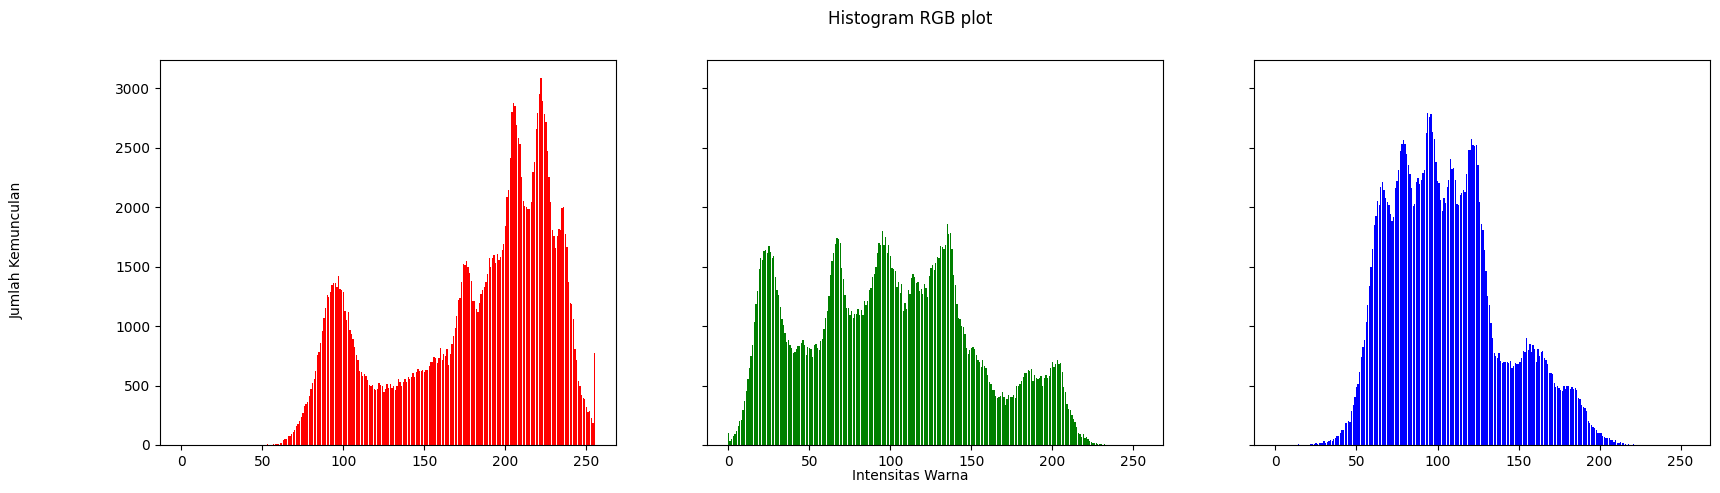

In [67]:
lena = cv.imread('Images/lena.jpg')

height, width, _ = lena.shape
names = np.arange(256)

blue, green, red = [np.zeros(256, dtype=int) for _ in range(3)]

for y in range(height):
    for x in range(width):
        b, g, r = lena[y, x]
        blue[b] += 1
        green[g] += 1
        red[r] += 1

fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()

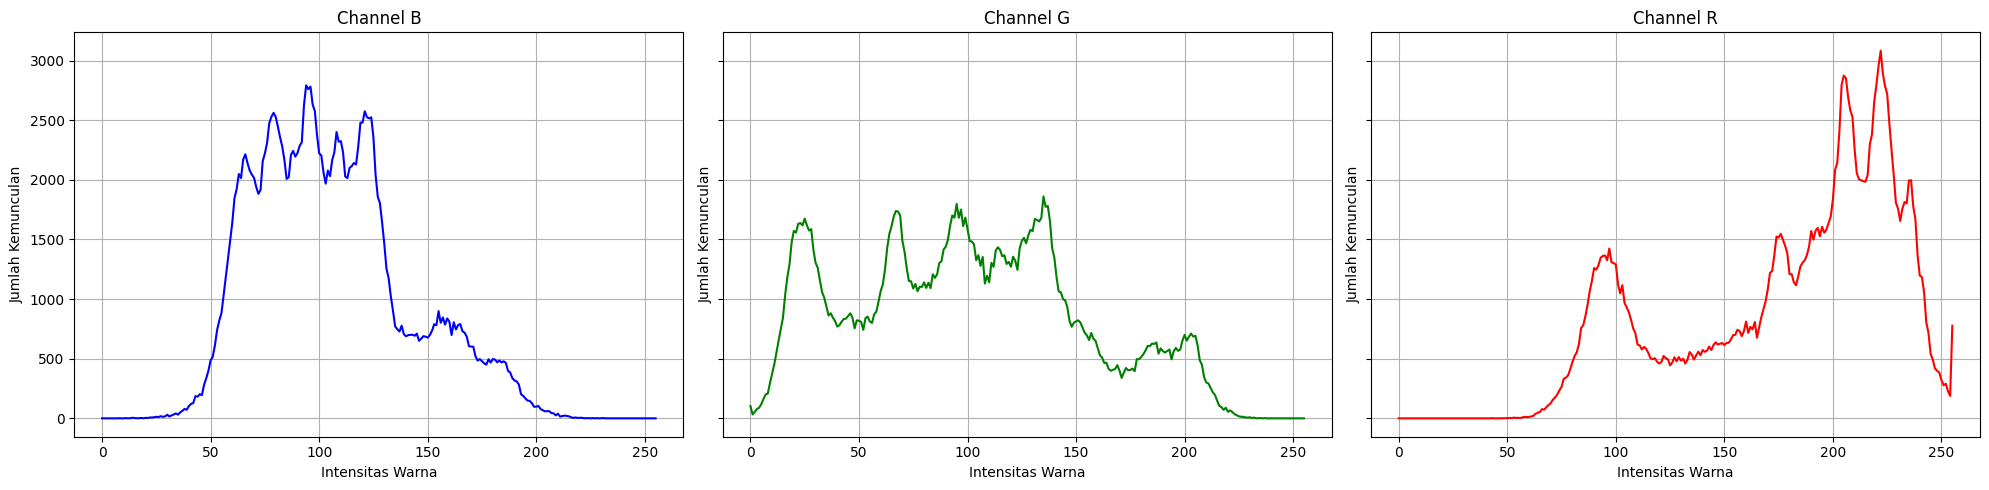

In [76]:
channels = cv.split(lena)
colors = ('b', 'g', 'r')

fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)

for i, color in enumerate(colors):
    hist, bins = np.histogram(channels[i], bins=256, range=(0, 256))
    axs[i].plot(bins[:-1], hist, color=color)
    axs[i].set_title(f'Channel {color.upper()}')
    axs[i].set_xlabel('Intensitas Warna')
    axs[i].set_ylabel('Jumlah Kemunculan')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [71]:
lena_path = 'Images/lena.jpg'
lena_lc_path = 'Images/lena_lc.jpg'

if os.path.exists(lena_lc_path):
  pass
else:
  image = Image.open(lena_path)

  enhancer = ImageEnhance.Contrast(image)
  low_contrast_image = enhancer.enhance(0.4)

  output_path = 'Images/lena_lc.jpg'
  low_contrast_image.save(output_path)

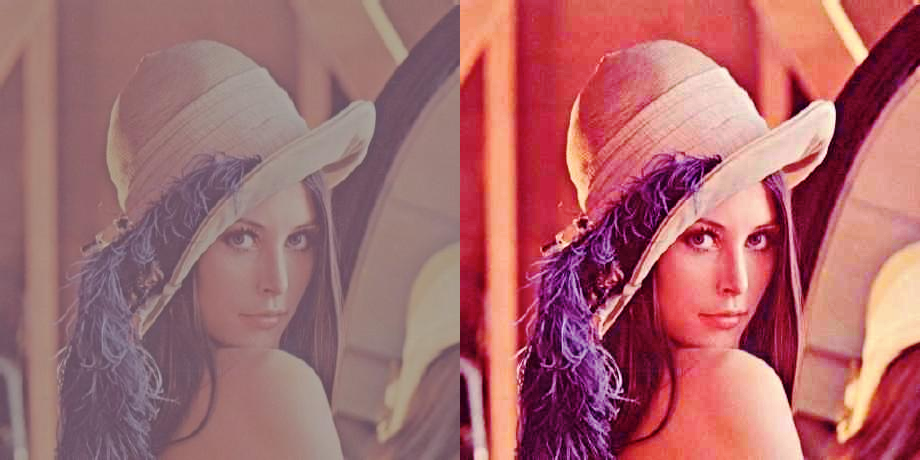

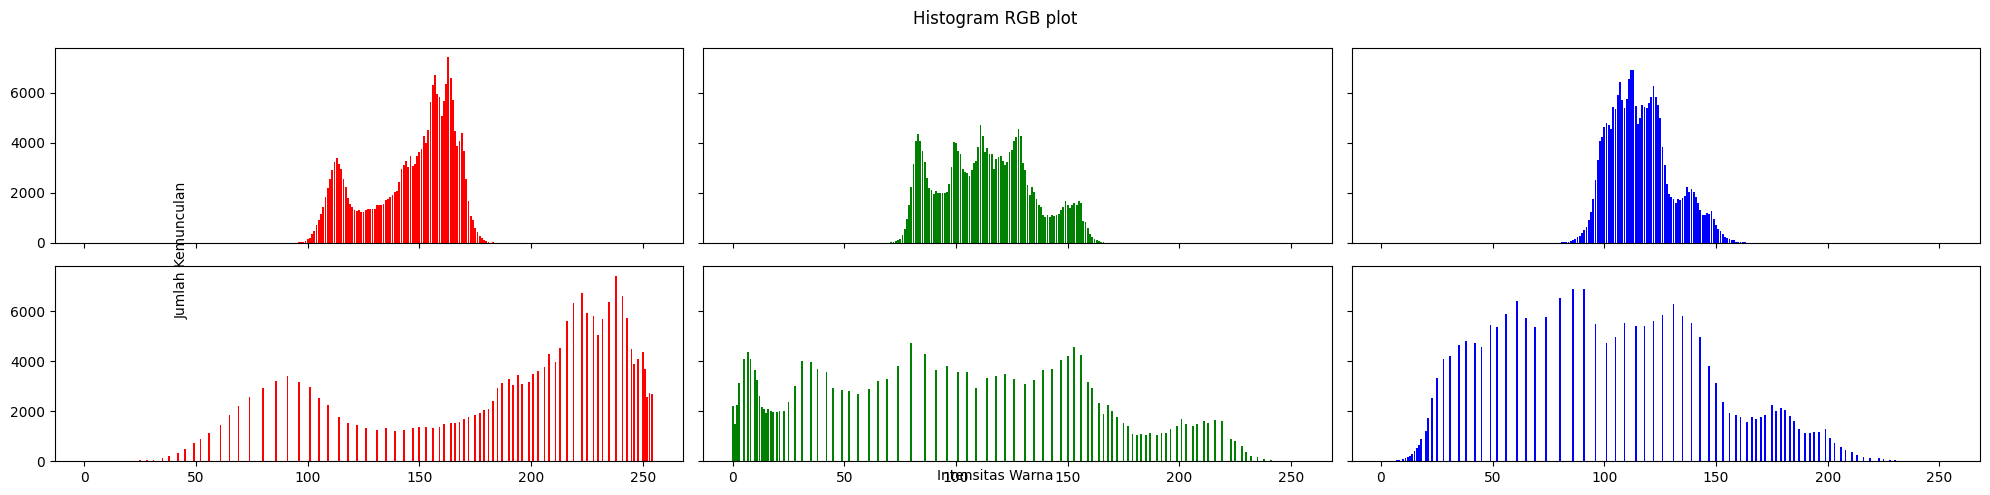

In [77]:
def histog(img):
    height, width, _ = img.shape
    ax = np.zeros((3, 256))

    for y in range(height):
        for x in range(width):
            ax[0][img[y, x, 0]] += 1
            ax[1][img[y, x, 1]] += 1
            ax[2][img[y, x, 2]] += 1

    return ax

lena_lc = cv.imread(lena_lc_path)

histo_asli = histog(lena_lc)

img_array = np.asarray(lena_lc)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

eq_img_array = np.reshape(transform_map[img_array.flatten()], img_array.shape)

equal_histo = histog(eq_img_array)

final_frame = cv.hconcat((lena_lc, eq_img_array))
cv2_imshow(final_frame)
names = np.arange(256)

is_gray_img = np.array_equal(histo_asli[0], histo_asli[1]) and np.array_equal(histo_asli[1], histo_asli[2])

if not is_gray_img:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')

    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

plt.tight_layout()
plt.show()

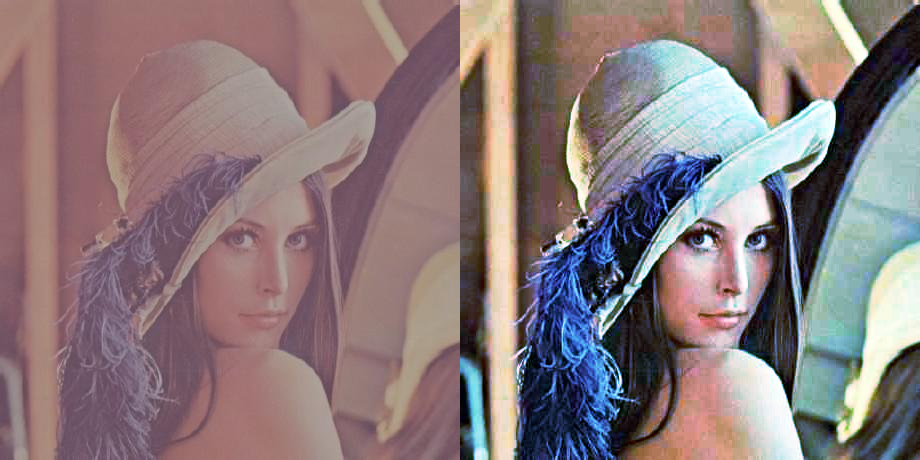

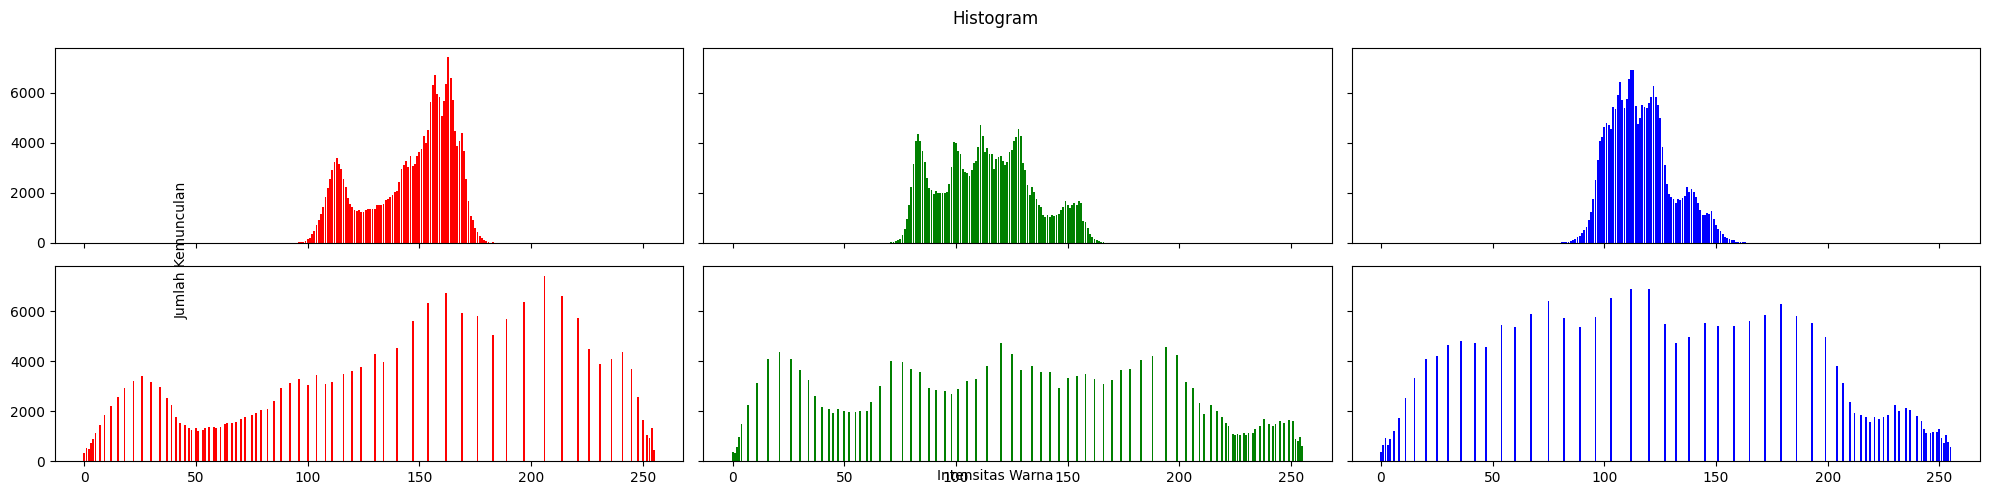

In [80]:
channels = cv.split(lena_lc)
eq_channels = [cv.equalizeHist(ch) for ch in channels]

eq_image = cv.merge(eq_channels)

histo_asli = histog(lena_lc)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((lena_lc, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)

fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')

axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.tight_layout()
plt.show()

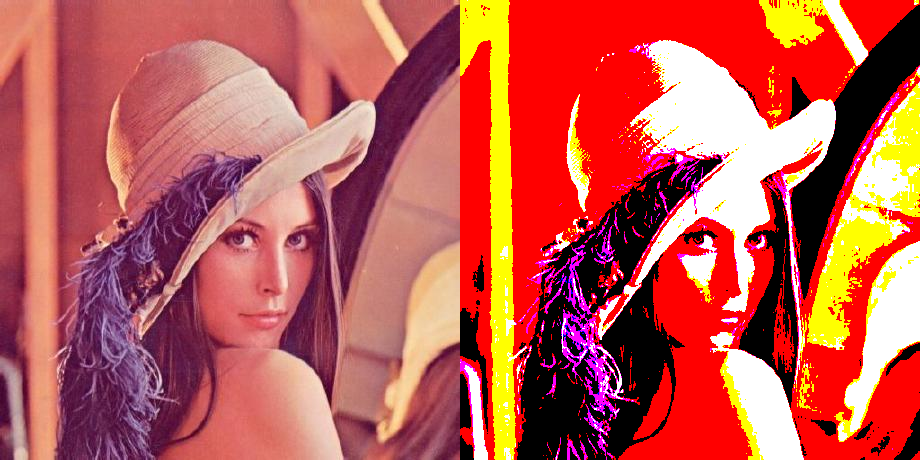

In [85]:
def closest_colour(r, g, b, colourPalette):
    distances = np.sum((colourPalette - np.array([r, g, b]))**2, axis=1)
    return np.argmin(distances)

colourPalette = np.array([[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0],
                         [0, 0, 255], [0, 255, 255], [255, 0, 255], [255, 255, 255]])

lena_copy = np.zeros_like(lena)

for y in range(lena.shape[0]):
    for x in range(lena.shape[1]):
        r, g, b = lena[y, x]
        index_warna = closest_colour(r, g, b, colourPalette)
        lena_copy[y, x] = colourPalette[index_warna]

final_frame = cv.hconcat([lena, lena_copy])

cv2_imshow(final_frame)

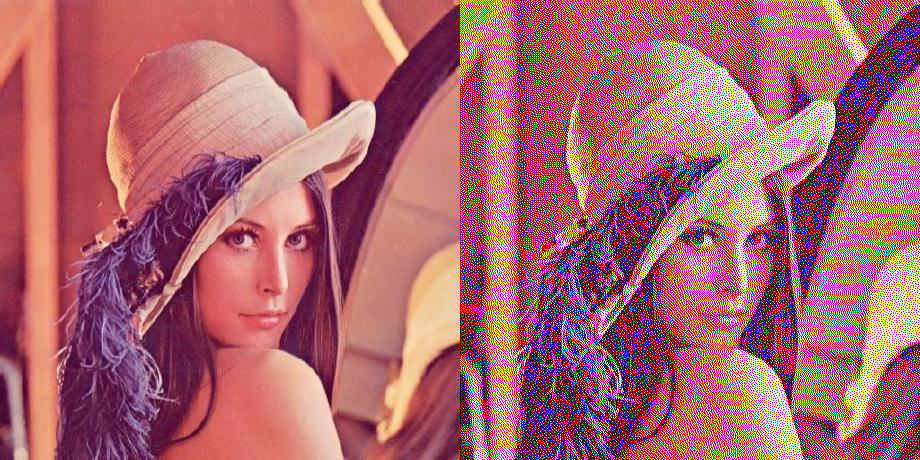

In [88]:
def floyd_steinberg_dithering(image):
    image_float = np.float64(image)
    height, width, channels = image.shape

    for row in range(height):
        for column in range(width):
            for channel in range(channels):
                old_value = image_float[row, column, channel]
                new_value = round(old_value / 255) * 255
                image_float[row, column, channel] = new_value

                quant_error = old_value - new_value

                if column < width - 1:
                    image_float[row, column + 1, channel] += quant_error * 7 / 16
                if row < height - 1:
                    if column > 0:
                        image_float[row + 1, column - 1, channel] += quant_error * 3 / 16
                    image_float[row + 1, column, channel] += quant_error * 5 / 16
                    if column < width - 1:
                        image_float[row + 1, column + 1, channel] += quant_error * 1 / 16

    dithered_image = np.uint8(image_float)
    return dithered_image

dithered_lena = floyd_steinberg_dithering(lena)

final_frame = cv.hconcat([lena, dithered_lena])
cv2_imshow(final_frame)

<ipython-input-98-52272616d6ef>:15: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 550 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  dithered_image[y, x] = new_pixel


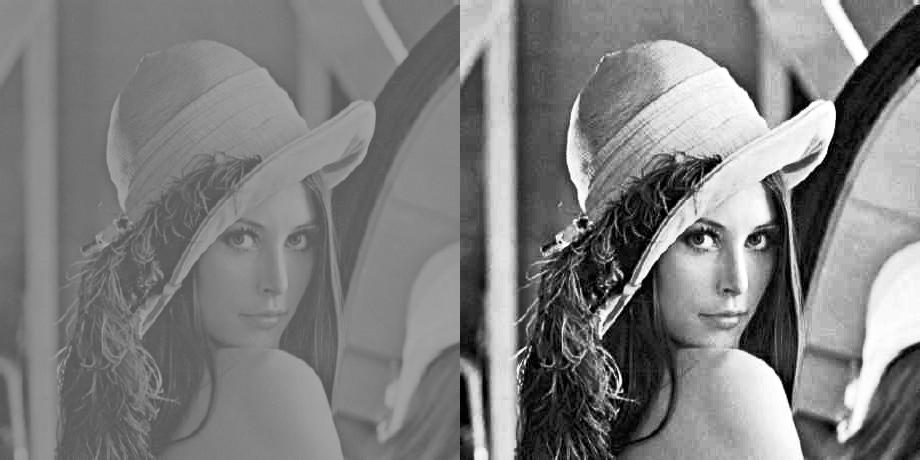

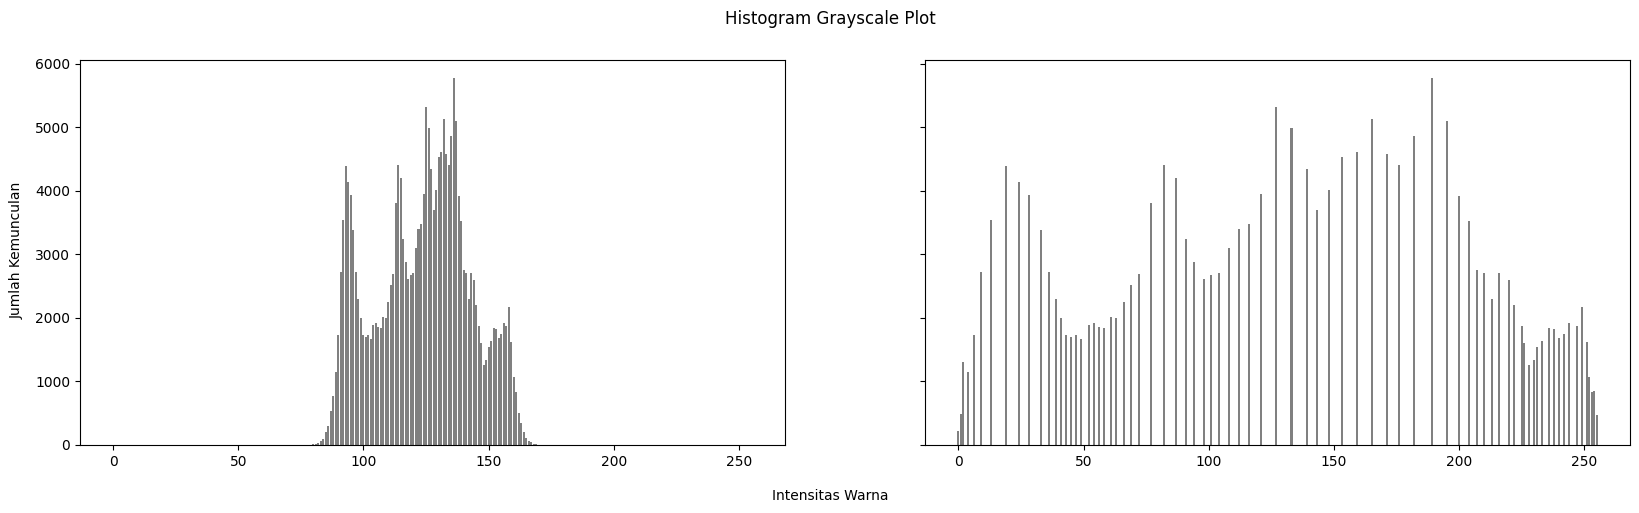

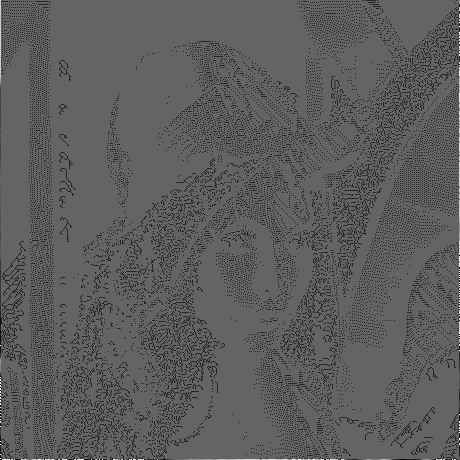

In [98]:
gray_lena_lc = cv.imread("Images/lena_lc.jpg", cv.IMREAD_GRAYSCALE)

equalized_image = cv.equalizeHist(gray_lena_lc)

height, width = equalized_image.shape

dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

histo_asli = cv.calcHist([gray_lena_lc], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

final_frame = cv.hconcat((gray_lena_lc, equalized_image))
cv2_imshow(final_frame)
plt.show()
cv2_imshow(dithered_image)